In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Calculate the mean and standard deviation of the Glucose column

In [4]:
glucose_mean = df['Glucose'].mean()
glucose_std = df['Glucose'].std()

In [5]:
print(f"Mean of Glucose: {glucose_mean}")
print(f"Standard Deviation of Glucose: {glucose_std}")

Mean of Glucose: 120.89453125
Standard Deviation of Glucose: 31.97261819513622


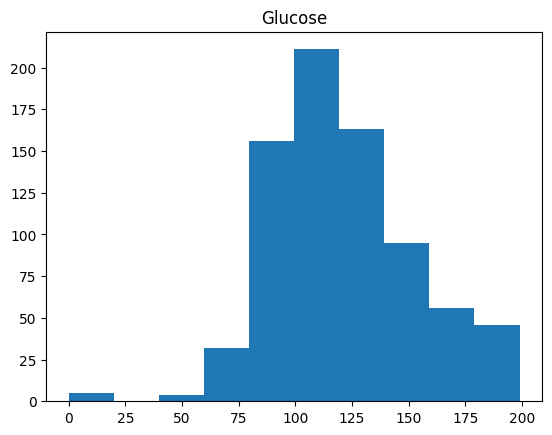

In [16]:
plt.hist(df['Glucose'])
plt.title('Glucose')
plt.show()

#### Calculate z-score for Glucose level of 68

###### using manual method

In [7]:
glucose_value = 68
z_score_168_manual = (glucose_value - glucose_mean) / glucose_std
print(f"Z-score for 68: {z_score_168_manual}")

Z-score for 68: -1.6543697149596115


###### using automatic way using zscore function
This will add a column for the z-score of Glucose for each record

In [8]:
df['Glucose_zscore'] = zscore(df['Glucose'])
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_zscore  
0                       0.627   50        1      

#### Find the row index where Glucose = 168

`df['Glucose'} == glucose_value` it Return "true" where Glucose = 68

df[now gets the actual record for 168

.index return the indices of rows matching this condition

In [9]:
row_index = df[df['Glucose'] == glucose_value].index
print(f"Row index where Glucose = 168: {row_index}")

Row index where Glucose = 168: Index([520, 617, 672], dtype='int64')


Now Extract the first row from Glucose_zscore DF where `Glucose = 168`

Hence row index[0] ... Remember, we multiply rows matching 168

In [10]:
z_score_168_using_function = df['Glucose_zscore'].iloc[row_index[0]]
print(f"Z-score for 168 using function: {z_score_168_using_function}")

Z-score for 168 using function: -1.6554478315386594


#### Calculate percentile for the z-score

In [11]:
percentile_168 = stats.norm.cdf(z_score_168_manual)*100 # Multiply by 100 to get percentage
print(f"Percentile for 168: {percentile_168}")

Percentile for 168: 4.902620798047028


#### Find the z-score at the 30th percentile

In [12]:
z_score_30 = stats.norm.ppf(0.30)
print(f"Z-score at 30th percentile: {z_score_30}")

Z-score at 30th percentile: -0.5244005127080409


#### Calculate the corresponding value for the z-score of the 30th percentile

In [13]:
glucose_value_30 = z_score_30 * glucose_std + glucose_mean
print(f"Value corresponding to 30th percentile: {glucose_value_30}")

Value corresponding to 30th percentile: 104.12807387585212


#### Given -socre of 2.8, Calculate the corresponding Glucose level

In [14]:
z_score_given = 2.8
glucose_value_given = z_score_given * glucose_std + glucose_mean
print(f"Glucose level corresponding to 2.8 z-score: {glucose_value_given}")

Glucose level corresponding to 2.8 z-score: 210.4178621963814


#### Calculate the percentile for the z-score of 2.8

In [15]:
percentile_given = stats.norm.cdf(z_score_given)*100    # Multiply by 100 to get percentage
print(f"Percentile for 2.8 z-score: {percentile_given}")

Percentile for 2.8 z-score: 99.7444869669572
